In [121]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import math
import copy
from functools import *
import time

In [122]:
target = (random.randint(0, 255))
length = 60
width = 40
MUTATION_RATE = 0.01
MAX_GEN = 10

In [123]:
def flatten_grid(grid) :
    return [item for sublist in grid for item in sublist]

def list_to_grid(flat_list, grid) :
    #grid = np.random.rand(length, width)
    for i in range(length-1) :
        for j in range(width) :
            #print(flat_list[(i*width) + j])
            grid[i][j] = flat_list[(i*width) + j]
    #return grid

In [124]:
def fitness(a) :
    return abs(target - a)

def compare(a, b) :
    #print(a, b)
    return fitness(a) - fitness(b)

def perform_selection(grid) :
    flat_list = flatten_grid(grid)
    #print(flat_list)
    new_list = sorted(flat_list, key=cmp_to_key(compare))
    #print(new_list)
    list_to_grid(new_list , grid)

def perform_mutation(grid) :
    flat_list = [item for sublist in grid for item in sublist]
    print(flat_list)
    l = len(flat_list) //2
    
    for i in range(0, l) :
        flat_list[i + l] = flat_list[i]
        if (random.random() < MUTATION_RATE) :
            flat_list[i + l] = (random.randint(0, 255))
    list_to_grid(flat_list,grid )
    #return grid

In [125]:
def run_generation(frame, grid, avg) :
    
    #grid = perform_selection(grid)
    perform_selection(grid)
    #display( grid, avg)
    print(np.mean(grid), target)
    perform_mutation(grid)
    #grid = perform_mutation(grid)
    print("After")
    print(np.mean(grid), target)
    avg.append((np.mean(grid), target))
    #display(grid, avg)
    c= ax0.pcolor(grid)
    c = ax1.plot(avg)
    return grid

125.95291666666667 65
[65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 65.0, 64.0, 64.0, 66.0, 66.0, 66.0, 66.0, 66.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 66.0, 66.0, 66.0, 64.0, 66.0, 64.0, 66.0, 63.0, 63.0, 63.0, 67.0, 63.0, 63.0, 63.0, 67.0, 67.0, 63.0, 67.0, 63.0, 67.0, 63.0, 63.0, 67.0, 68.0, 62.0, 68.0, 62.0, 68.0, 68.0, 68.0, 62.0, 68.0, 62.0, 68.0, 62.0, 68.0, 68.0, 62.0, 68.0, 62.0, 69.0, 61.0, 61.0, 61.0, 61.0, 69.0, 61.0, 61.0, 61.0, 69.0, 61.0, 61.0, 69.0, 69.0, 61.0, 69.0, 69.0, 69.0, 69.0, 61.0, 61.0, 69.0, 70.0, 60.0, 60.0, 70.0, 60.0, 70.0, 70.0, 60.0, 60.0, 70.0, 60.0, 60.0, 60.0, 70.0, 60.0, 60.0, 60.0, 70.0, 60.0, 60.0, 70.0, 59.0, 59.0, 71.0, 71.0, 59.0, 71.0, 59.0, 71.0, 71.0, 71.0, 71.0, 59.0, 71.0, 71.0, 71.0, 59.0, 58.0, 72.0, 72.0, 72.0, 58.0, 58.0, 72.0, 72.0, 72.0, 58.0, 72.0, 58.0, 58.0, 72.0, 72.0, 58.0, 72.0, 57.0, 73.0, 73.0, 73.0, 73.0, 73.0, 57.0, 57.0, 57.0, 57.0, 73.0, 57.0, 57.0, 57.0, 73.0, 73.0, 73.0, 73.0, 57.0, 73.0, 57.0, 73.0, 73.0, 73.0,

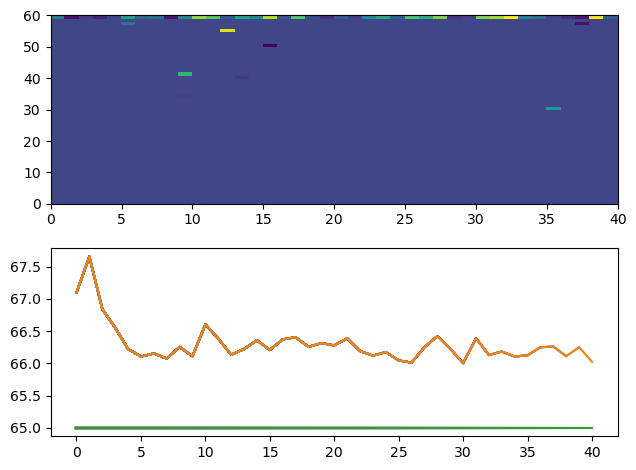

In [126]:
grid = np.random.rand(length, width)


avg = []
#for x in range (1, 1000) :
#    avg.append((math.sin(x/100), math.cos(x/100)))



for i in range(length) :
   for j in range(width) :
        grid[i][j] = (random.randint(0, 255))

fig, (ax0, ax1) = plt.subplots(2, 1)
fig.tight_layout()

c= ax0.pcolor(grid)
c = ax1.plot(avg)

#for generation in range(0, MAX_GEN) :
#    run_generation()
    
ani = animation.FuncAnimation(fig=fig, func=partial(run_generation, grid=grid, avg =avg), frames=40, interval=30)
ani.save(filename="pillow_example.gif", writer="pillow")
plt.show()
    
